 Loaded 977 training images and 245 validation images.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.6847 - loss: 0.5657 - val_accuracy: 0.9429 - val_loss: 0.1942
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9366 - loss: 0.1997 - val_accuracy: 0.9347 - val_loss: 0.1732
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.9297 - loss: 0.1727 - val_accuracy: 0.9592 - val_loss: 0.1321
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9575 - loss: 0.1197 - val_accuracy: 0.9755 - val_loss: 0.0632
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9680 - loss: 0.0883 - val_accuracy: 0.9714 - val_loss: 0.0824
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9856 - loss: 0.0556 - val_accuracy: 0.9469 - val_loss: 0.1166
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9806 - loss: 0.0563 - val_accuracy: 0.9755 - val_loss: 0.0484
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9862 - loss: 0.0448 - val_accuracy: 0

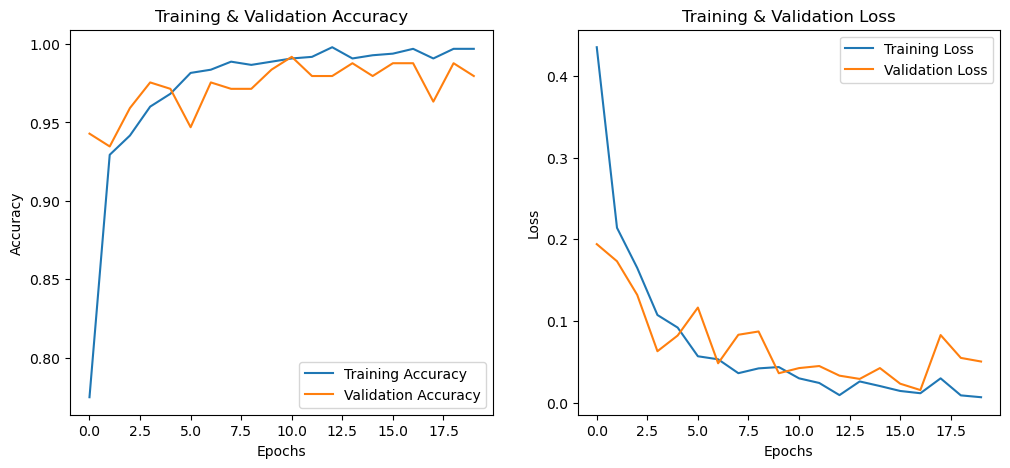

In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define dataset paths (Change this to your dataset location)
dataset_dir = r"C:\Users\YourUsername\Desktop\EyeDataset"
open_eye_dir = os.path.join(r"C:\Users\Shivananda\OneDrive\Desktop\train\Open")  # Folder containing open eye images
closed_eye_dir = os.path.join(r"C:\Users\Shivananda\OneDrive\Desktop\train\Closed")  # Folder containing closed eye images

#  Image size for CNN
IMG_SIZE = 64  

#  Lists to store images and labels
images = []
labels = []

#  Read images and assign labels based on folder name
for category, folder in [("open", open_eye_dir), ("closed", closed_eye_dir)]:
    label = 1 if category == "open" else 0  # Open = 1, Closed = 0
    
    if not os.path.exists(folder):
        print(f" Error: Folder '{folder}' not found!")
        continue
    
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize to CNN input size
            image = image / 255.0  # Normalize (0 to 1)
            images.append(image)
            labels.append(label)

#  Convert to NumPy arrays
X = np.array(images)
y = np.array(labels)

#  One-hot encode labels (for categorical classification)
y = to_categorical(y, num_classes=2)  

#  Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f" Loaded {len(X_train)} training images and {len(X_val)} validation images.")

#  Define CNN model
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

#  Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#  Train the model
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_val, y_val)
)

#  Save the trained model
model.save('eye_classification_model.keras')
print(" CNN Model Trained and Saved Successfully!")

#  Evaluate Model
loss, acc = model.evaluate(X_val, y_val)
print(f" Validation Accuracy: {acc:.2f}")

#  Load and Test the Model
def predict_eye(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f" Error: Could not read image {image_path}")
        return
    
    image = cv2.resize(image, (64, 64))
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0).astype(np.float32)  # Ensure correct format

    model = tf.keras.models.load_model("eye_classification_model.keras")
    prediction = model.predict(image)[0]
    
    print(f"🔹 Model Raw Output: {prediction}")  # Debugging
    
    if np.argmax(prediction) == 1:
        print(" Detected: Open Eye")
    else:
        print(" Detected: Closed Eye")

#  Test with an image
predict_eye(r"C:\Users\Shivananda\OneDrive\Desktop\Glass closed eye.jpg")
#  Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Show plots
plt.show()